In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import numpy as np

labelEncoder = LabelEncoder()
globalancestrydf = pd.read_csv('GlobalAncestry-1.csv')

print(globalancestrydf.tail())

           ancestry  pos1  pos2  pos3  pos4  pos5  pos6  pos7  pos8  pos9  \
237         Mexican     0     2     1     2     0     1     1     0     1   
238  NativeAmerican     1     2     1     2     0     1     2     0     0   
239         Mexican     0     2     0     2     1     0     2     0     1   
240       EastAsian     0     2     0     1     0     0     2     0     1   
241       EastAsian     0     0     1     2     2     0     2     0     1   

     ...  pos8907  pos8908  pos8909  pos8910  pos8911  pos8912  pos8913  \
237  ...        1        1        1        0        1        1        2   
238  ...        2        0        1        0        1        0        2   
239  ...        0        0        1        2        1        0        2   
240  ...        1        0        0        0        0        2        2   
241  ...        0        0        0        1        0        1        2   

     pos8914  pos8915  pos8916  
237        0        0        0  
238        0        

In [2]:
X = globalancestrydf.copy(deep=True)
X.drop(columns=['ancestry'], inplace=True)

In [3]:
Y = globalancestrydf.copy(deep=True)
Y['ancestry'] = labelEncoder.fit_transform(Y['ancestry'])
y = Y['ancestry']
print(y)

0      1
1      5
2      3
3      1
4      0
      ..
237    3
238    4
239    3
240    1
241    1
Name: ancestry, Length: 242, dtype: int32


In [4]:
#nc = 2
#pca = PCA(n_components=nc)

pca = PCA()
 
Z = pca.fit_transform(X)
 
pca.explained_variance_ratio_

array([6.75463949e-02, 5.42573747e-02, 3.91130344e-02, 3.16312175e-02,
       1.01920424e-02, 9.13464078e-03, 8.75530517e-03, 5.47287356e-03,
       5.21706022e-03, 4.82593534e-03, 4.79334087e-03, 4.74534076e-03,
       4.73672255e-03, 4.68381478e-03, 4.67693974e-03, 4.65124880e-03,
       4.60372804e-03, 4.58731999e-03, 4.56001376e-03, 4.54675375e-03,
       4.52996104e-03, 4.52076633e-03, 4.50118368e-03, 4.46271204e-03,
       4.45148709e-03, 4.44132682e-03, 4.41004467e-03, 4.40471817e-03,
       4.38977696e-03, 4.36042747e-03, 4.34699760e-03, 4.33450560e-03,
       4.32301384e-03, 4.29094488e-03, 4.28116929e-03, 4.27099764e-03,
       4.26703983e-03, 4.24595032e-03, 4.22654627e-03, 4.21304826e-03,
       4.20030772e-03, 4.18871431e-03, 4.17474411e-03, 4.16582766e-03,
       4.15231257e-03, 4.14015346e-03, 4.12747504e-03, 4.09735515e-03,
       4.09596185e-03, 4.08979221e-03, 4.07305716e-03, 4.05393533e-03,
       4.04466772e-03, 4.01875706e-03, 4.01392432e-03, 4.00077945e-03,
      

In [5]:
Z[:242]

array([[-8.08700295e+00,  8.63242825e+00, -1.15053162e+01, ...,
        -3.58915104e-01, -6.41847751e-01,  2.78663188e-14],
       [ 7.83950588e+00,  2.95467993e+01,  1.87313610e+01, ...,
         3.76649506e-01, -5.02285407e-01,  2.78663188e-14],
       [-4.95243614e+00, -1.01059035e+01,  2.58164801e+00, ...,
        -6.37055155e-01,  4.39863729e-02,  2.78663188e-14],
       ...,
       [-3.63723910e+00, -1.04647182e+01,  3.32362473e+00, ...,
         1.67507574e-02,  4.94386492e-01,  2.78663188e-14],
       [-8.83080492e+00,  1.08939025e+01, -1.36463911e+01, ...,
        -4.40198848e-02,  9.33027991e-01,  2.78663188e-14],
       [-8.24863314e+00,  9.00175564e+00, -1.29612288e+01, ...,
        -4.54836266e-01,  8.33877909e-01,  2.78663188e-14]])

In [6]:
ZSet = Z[:242]
print(ZSet)

[[-8.08700295e+00  8.63242825e+00 -1.15053162e+01 ... -3.58915104e-01
  -6.41847751e-01  2.78663188e-14]
 [ 7.83950588e+00  2.95467993e+01  1.87313610e+01 ...  3.76649506e-01
  -5.02285407e-01  2.78663188e-14]
 [-4.95243614e+00 -1.01059035e+01  2.58164801e+00 ... -6.37055155e-01
   4.39863729e-02  2.78663188e-14]
 ...
 [-3.63723910e+00 -1.04647182e+01  3.32362473e+00 ...  1.67507574e-02
   4.94386492e-01  2.78663188e-14]
 [-8.83080492e+00  1.08939025e+01 -1.36463911e+01 ... -4.40198848e-02
   9.33027991e-01  2.78663188e-14]
 [-8.24863314e+00  9.00175564e+00 -1.29612288e+01 ... -4.54836266e-01
   8.33877909e-01  2.78663188e-14]]


In [7]:
ZTemp = pd.DataFrame(data = Z)
#ZTemp = pd.DataFrame(data = Z, columns = ['pc1', 'pc2'])
ZTemp = pd.concat([ZTemp, globalancestrydf[['ancestry']]], axis=1)
move_column = ZTemp.pop('ancestry')
ZTemp.insert(0, 'ancestry', move_column)
print(ZTemp)

           ancestry          0          1          2          3          4  \
0         EastAsian  -8.087003   8.632428 -11.505316  -8.033690  -1.687833   
1          Oceanian   7.839506  29.546799  18.731361   9.822369 -11.883163   
2           Mexican  -4.952436 -10.105904   2.581648   5.360128   1.293896   
3         EastAsian  -8.002041   9.060365 -11.699115  -7.404550  -0.117817   
4           African  36.139105  -6.237873 -12.232099   8.679494   3.658954   
..              ...        ...        ...        ...        ...        ...   
237         Mexican  -9.424310  -8.050516   0.459079   8.251414   0.736174   
238  NativeAmerican -18.742046 -10.330031  -2.474026  17.177707   1.185034   
239         Mexican  -3.637239 -10.464718   3.323625   2.502091   0.875920   
240       EastAsian  -8.830805  10.893903 -13.646391  -8.429904  -1.078676   
241       EastAsian  -8.248633   9.001756 -12.961229  -8.176468  -0.514159   

             5          6         7         8  ...       232   

In [8]:
Z_withAncestry = ZTemp.copy(deep=True)
print(Z_withAncestry)

           ancestry          0          1          2          3          4  \
0         EastAsian  -8.087003   8.632428 -11.505316  -8.033690  -1.687833   
1          Oceanian   7.839506  29.546799  18.731361   9.822369 -11.883163   
2           Mexican  -4.952436 -10.105904   2.581648   5.360128   1.293896   
3         EastAsian  -8.002041   9.060365 -11.699115  -7.404550  -0.117817   
4           African  36.139105  -6.237873 -12.232099   8.679494   3.658954   
..              ...        ...        ...        ...        ...        ...   
237         Mexican  -9.424310  -8.050516   0.459079   8.251414   0.736174   
238  NativeAmerican -18.742046 -10.330031  -2.474026  17.177707   1.185034   
239         Mexican  -3.637239 -10.464718   3.323625   2.502091   0.875920   
240       EastAsian  -8.830805  10.893903 -13.646391  -8.429904  -1.078676   
241       EastAsian  -8.248633   9.001756 -12.961229  -8.176468  -0.514159   

             5          6         7         8  ...       232   

In [9]:
nc = 2
pca2 = PCA(n_components=nc)

 
Z2 = pca2.fit_transform(X)
ZTemp2 = pd.DataFrame(data = Z2, columns = ['pc1', 'pc2'])
print(ZTemp2)

           pc1        pc2
0    -8.087003   8.632428
1     7.839506  29.546799
2    -4.952436 -10.105903
3    -8.002041   9.060365
4    36.139105  -6.237873
..         ...        ...
237  -9.424310  -8.050515
238 -18.742046 -10.330031
239  -3.637239 -10.464718
240  -8.830805  10.893903
241  -8.248633   9.001756

[242 rows x 2 columns]


In [10]:
ZTemp2 = pd.concat([ZTemp2, globalancestrydf[['ancestry']]], axis=1)
move_column = ZTemp2.pop('ancestry')
ZTemp2.insert(0, 'ancestry', move_column)
print(ZTemp2)


           ancestry        pc1        pc2
0         EastAsian  -8.087003   8.632428
1          Oceanian   7.839506  29.546799
2           Mexican  -4.952436 -10.105903
3         EastAsian  -8.002041   9.060365
4           African  36.139105  -6.237873
..              ...        ...        ...
237         Mexican  -9.424310  -8.050515
238  NativeAmerican -18.742046 -10.330031
239         Mexican  -3.637239 -10.464718
240       EastAsian  -8.830805  10.893903
241       EastAsian  -8.248633   9.001756

[242 rows x 3 columns]


In [11]:
Z_withAncestryPC2 = ZTemp2.copy(deep=True)
print(Z_withAncestryPC2)

           ancestry        pc1        pc2
0         EastAsian  -8.087003   8.632428
1          Oceanian   7.839506  29.546799
2           Mexican  -4.952436 -10.105903
3         EastAsian  -8.002041   9.060365
4           African  36.139105  -6.237873
..              ...        ...        ...
237         Mexican  -9.424310  -8.050515
238  NativeAmerican -18.742046 -10.330031
239         Mexican  -3.637239 -10.464718
240       EastAsian  -8.830805  10.893903
241       EastAsian  -8.248633   9.001756

[242 rows x 3 columns]


In [12]:
ZKnown = ZTemp2[ZTemp2['ancestry'].isin(['African', 'European', 
                                         'EastAsian', 'Oceanian', 
                                         'Mexican', 'NativeAmerican'])]
ZUnknown = ZTemp2[ZTemp2['ancestry'].isin(['Unknown1', 
                                           'Unknown2', 'Unknown3', 
                                           'Unknown4', 'Unknown5'])]

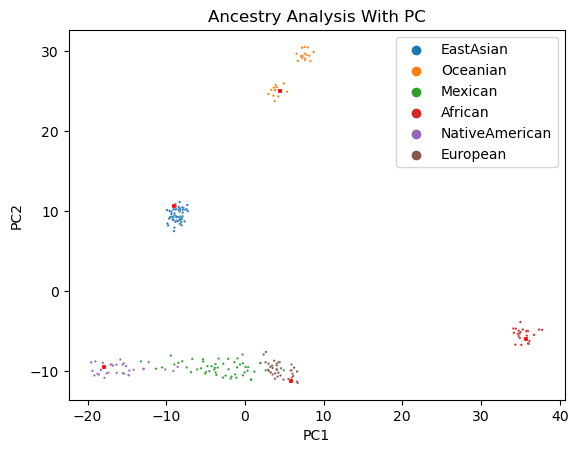

In [13]:
sns.scatterplot(data=ZKnown, x='pc1', y='pc2', s=3, hue='ancestry', marker='o')
sns.scatterplot(data=ZUnknown, x='pc1', y='pc2', s=5, color='red', marker='s')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Ancestry Analysis With PC')
plt.show()

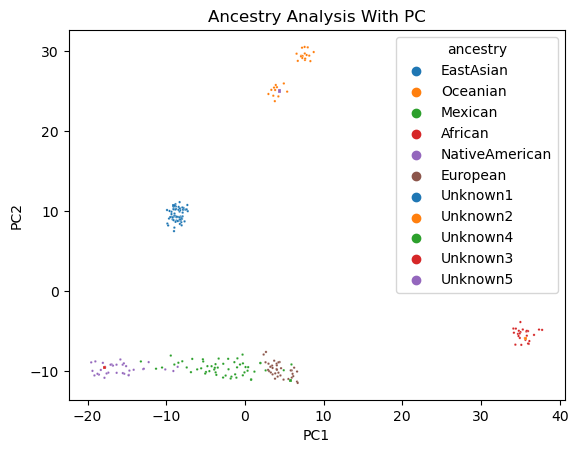

In [14]:
sns.scatterplot(data=ZKnown, x='pc1', y='pc2', s=3, hue='ancestry', marker='o')
sns.scatterplot(data=ZUnknown, x='pc1', y='pc2', s=5, hue='ancestry', marker='s')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Ancestry Analysis With PC')
plt.show()

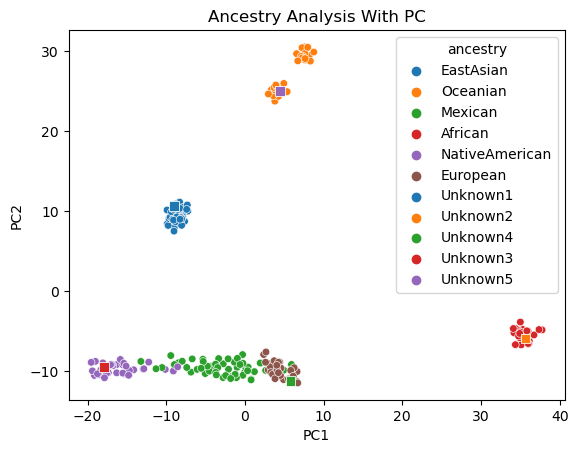

In [15]:
sns.scatterplot(data=ZKnown, x='pc1', y='pc2', s=30, hue='ancestry', marker='o')
sns.scatterplot(data=ZUnknown, x='pc1', y='pc2', s=50, hue='ancestry', marker='s')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Ancestry Analysis With PC')
plt.show()

markerSet = {'European':'o', 'NativeAmerican':'o', 'Unknown1':'s', 'Unknown3':'s', 
                 'Mexican':'o', 'Unknown5':'s', 'Unknown2':'s', 'Unknown4':'s', 'African':'o',
                'EastAsian':'o', 'Oceanian':'o'}
sns.scatterplot(data=ZTemp2, x='pc1', y='pc2', hue='ancestry',style='ancestry', markers=markerSet)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Ancestry Analysis With PC')
plt.show()

In [16]:
print("Ancestry----------Predictions Based On The Graph")
print("----------------------------")
print("Unknown1----------EastAsian")
print("Unknown2----------African")
print("Unknown3----------NativeAmerican")
print("Unknown4----------European")
print("Unknown5----------Oceanian")

Ancestry----------Predictions Based On The Graph
----------------------------
Unknown1----------EastAsian
Unknown2----------African
Unknown3----------NativeAmerican
Unknown4----------European
Unknown5----------Oceanian


<BarContainer object of 242 artists>

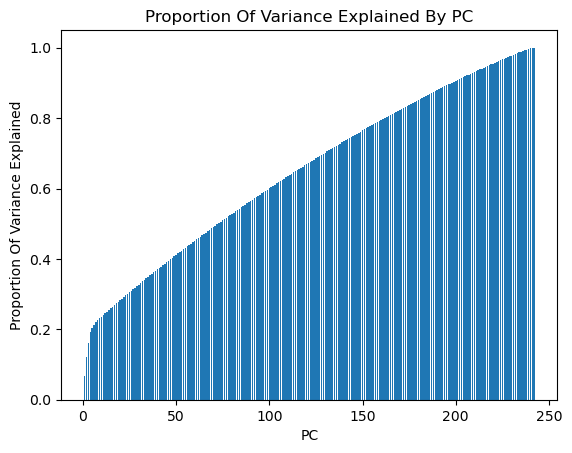

In [17]:
cumulativevr = np.cumsum(pca.explained_variance_ratio_)

plt.xlabel('PC')
plt.ylabel('Proportion Of Variance Explained')
plt.title('Proportion Of Variance Explained By PC')
rangecvr = len(cumulativevr) + 1
plt.bar(range(1, rangecvr), cumulativevr)

<BarContainer object of 2 artists>

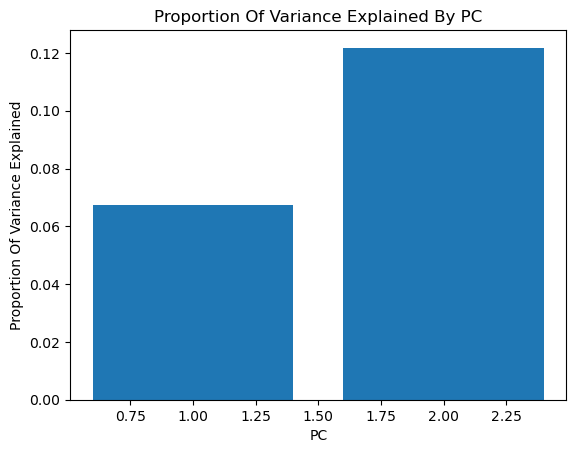

In [18]:
cumulativevr2 = np.cumsum(pca2.explained_variance_ratio_)

plt.xlabel('PC')
plt.ylabel('Proportion Of Variance Explained')
plt.title('Proportion Of Variance Explained By PC')
rangecvr = len(cumulativevr2) + 1
plt.bar(range(1, rangecvr), cumulativevr2)

In [19]:
np.cumsum(pca.explained_variance_ratio_)

array([0.06754639, 0.12180377, 0.1609168 , 0.19254802, 0.20274006,
       0.2118747 , 0.22063001, 0.22610288, 0.23131994, 0.23614588,
       0.24093922, 0.24568456, 0.25042128, 0.2551051 , 0.25978204,
       0.26443329, 0.26903701, 0.27362433, 0.27818435, 0.2827311 ,
       0.28726106, 0.29178183, 0.29628301, 0.30074573, 0.30519721,
       0.30963854, 0.31404858, 0.3184533 , 0.32284308, 0.32720351,
       0.3315505 , 0.33588501, 0.34020802, 0.34449897, 0.34878014,
       0.35305114, 0.35731817, 0.36156413, 0.36579067, 0.37000372,
       0.37420403, 0.37839274, 0.38256749, 0.38673331, 0.39088563,
       0.39502578, 0.39915325, 0.40325061, 0.40734657, 0.41143636,
       0.41550942, 0.41956336, 0.42360802, 0.42762678, 0.43164071,
       0.43564148, 0.43963288, 0.4436105 , 0.44756994, 0.45151881,
       0.45545409, 0.45938143, 0.46329908, 0.46719337, 0.47108173,
       0.47496288, 0.47883293, 0.48268668, 0.4865273 , 0.49035975,
       0.49418049, 0.49799494, 0.50179981, 0.50559393, 0.50937